<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [16]:
import glob
import pickle
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [17]:
import seaborn as sns
sns.set()
sns.set_style('white')
sns.set_style('ticks')
plt.style.use('../my_rcparams.mplstyle')

In [18]:
panelcpath = glob.glob('../../data_final/fig1_panel_c.pkl')
panel_S11 = pickle.load(open(panelcpath[0],'rb'))
paneldpath = glob.glob('../../data_final/fig1_panel_d.pkl')
panel_2D = pickle.load(open(paneldpath[0],'rb'))
panelivpath = glob.glob('../../data_final/fig1_panel_iv.pkl')
panel_iv = pickle.load(open(panelivpath[0],'rb'))

In [19]:
dpi = 1000
figtextsize=10

In [20]:
import matplotlib
cmap = matplotlib.cm.get_cmap('YlGn_r')

In [21]:
fulldev = plt.imread('temp/optical_big.svg.png')
im_r = np.zeros(np.shape(fulldev))
im_r[:,:,0] = fulldev[:,:,0]
smalldev = plt.imread('temp/optical_small.svg.png')
circuit = plt.imread('temp/rfcircuit.svg.png')

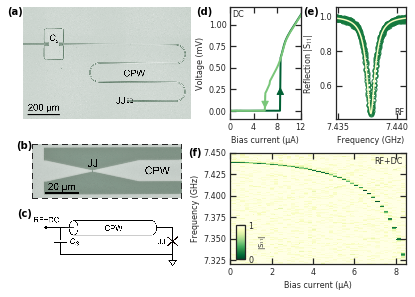

In [22]:
plt.style.use('../my_rcparams.mplstyle')

fig = plt.figure(figsize=cm2inch(17.6, 12))
gs = gridspec.GridSpec(2, 4, wspace=0.5, hspace=0.3)
"""
fig = plt.figure(figsize=cm2inch(17.6,12),constrained_layout=True)
gs = fig.add_gridspec(2, 4, wspace=0.5,hspace=0.3)
"""

ax1 = fig.add_subplot(gs[0, :2])
# im = ax1.imshow(fulldev[:,:,0],interpolation='none',cmap=cmap)
im = ax1.imshow(fulldev, interpolation='none')
# ax1.text(0.18,0.72, '$C_s$', fontsize=figtextsize, weight='normal', color='black',transform=ax1.transAxes, verticalalignment = 'center', horizontalalignment = 'center')
# ax1.text(0.58,0.2, 'JJ', fontsize=figtextsize, weight='normal', color='black',transform=ax1.transAxes, verticalalignment = 'center', horizontalalignment = 'center')

ax12 = fig.add_axes([0.15, 0.25, 0.3, 0.3])
im = ax12.imshow(smalldev, interpolation='none')
for thespine in ax12.spines:
    ax12.spines[thespine].set_linestyle((0, (5, 5)))
    ax12.spines[thespine].set_linewidth(1)

ax13 = fig.add_axes([0.15, 0.05, 0.3, 0.3])
im = ax13.imshow(circuit, interpolation='none')

for theax in [ax1, ax12, ax13]:
    theax.axes.xaxis.set_ticks([])
    theax.axes.yaxis.set_ticks([])
    if theax in [ax1, ax13]:
        theax.axis('off')

ax2 = fig.add_subplot(gs[0, 2])
ax2.plot(panel_iv['x1'],
         panel_iv['y1'],
         '-',
         label=r'$\rightarrow$',
         color=cmap(0.1))
ax2.plot(panel_iv['x2'],
         panel_iv['y2'],
         '-',
         label=r'$\leftarrow$',
         color=cmap(0.5))
plt.xlim(0, 12)
plt.xticks([0, 4, 8, 12])
plt.gca().set_ylim(top=1.2)
ax2.set_xlabel(panel_iv['xlabel'])
ax2.set_ylabel(panel_iv['ylabel'])
plt.annotate("",
             xy=(8.55, 0.3),
             xytext=(8.55, 0.0),
             arrowprops=dict(arrowstyle="-|>, head_width=0.4, head_length=0.8",
                             color=cmap(0.1)))
plt.annotate("",
             xy=(5.95, 0.0),
             xytext=(5.95, 0.2),
             arrowprops=dict(arrowstyle="-|>, head_width=0.4, head_length=0.8",
                             color=cmap(0.5)))
plt.text(0.03, 0.98, 'DC', ha='left', va='top', transform=ax2.transAxes)

ax3 = fig.add_subplot(gs[0, 3])
plt.plot(panel_S11['xmeas'],
         abs(panel_S11['ymeas']),
         'o',
         label=panel_S11['ymeaslabel'],
         markerfacecolor='none',
         markeredgecolor=cmap(0.2))
plt.plot(panel_S11['xtheo'],
         abs(panel_S11['ytheo']),
         label=panel_S11['ytheolabel'],
         c=cmap(0.9),
         lw=1.5)
ax3.set_xlabel(panel_S11['xlabel'])
ax3.set_ylabel(r'Reflection |S$_{11}$|')
df = 3e-3
ax3.set_xlim(panel_S11['f0'] - df, panel_S11['f0'] + df)
plt.text(0.97, 0.1, 'RF', ha='right', va='top', transform=ax3.transAxes)

ax4 = fig.add_subplot(gs[1, 2:])
plt.pcolormesh(panel_2D['x'],
               panel_2D['y'],
               panel_2D['zraw'],
               cmap=cmap,
               linewidth=0,
               rasterized=True,
               zorder=-1,
               vmin=0,
               vmax=1)
ax4.set_xlim(0, 8.5)
ax4.set_ylim(7.32, 7.45)
ax4.set_xlabel(panel_2D['xlabel'])
ax4.set_ylabel(panel_2D['ylabel'])
plt.text(0.98, 0.96, 'RF+DC', ha='right', va='top', transform=ax4.transAxes)

axins4 = inset_axes(ax4, width="5%", height="30%", loc=3)
cbar = plt.colorbar(cax=axins4, ticks=[0, 1])
cbar.set_label(r'|S$_{11}$|', fontsize=7)

ax1.text(-0.05,
         0.96,
         '(a)',
         fontsize=figtextsize,
         weight='bold',
         color='black',
         transform=ax1.transAxes,
         verticalalignment='center',
         horizontalalignment='center')
# ax1.text(0.11,0.1, r'200 μm', fontsize=figtextsize, weight='bold',color='black',transform=ax1.transAxes, verticalalignment = 'center', horizontalalignment = 'center')
ax12.text(-0.05,
          0.96,
          '(b)',
          fontsize=figtextsize,
          weight='bold',
          color='black',
          transform=ax12.transAxes,
          verticalalignment='center',
          horizontalalignment='center')
ax13.text(-0.05,
          0.96,
          '(c)',
          fontsize=figtextsize,
          weight='bold',
          color='black',
          transform=ax13.transAxes,
          verticalalignment='center',
          horizontalalignment='center',
          zorder=999)
ax2.text(-0.37,
         0.96,
         '(d)',
         fontsize=figtextsize,
         weight='bold',
         color='black',
         transform=ax2.transAxes,
         verticalalignment='center',
         horizontalalignment='center')
ax3.text(-0.35,
         0.96,
         '(e)',
         fontsize=figtextsize,
         weight='bold',
         color='black',
         transform=ax3.transAxes,
         verticalalignment='center',
         horizontalalignment='center')
ax4.text(-0.2,
         1,
         '(f)',
         fontsize=figtextsize,
         weight='bold',
         color='black',
         transform=ax4.transAxes,
         verticalalignment='center',
         horizontalalignment='center')

plt.savefig('Figure1.pdf', bbox_inches='tight', dpi=dpi)
plt.show()
plt.close()

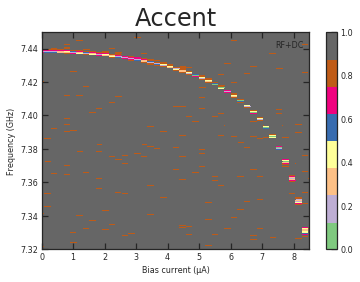

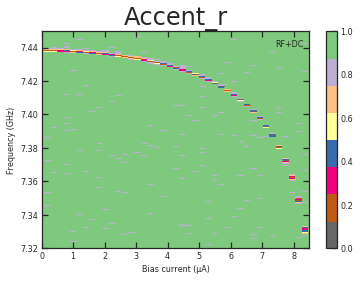

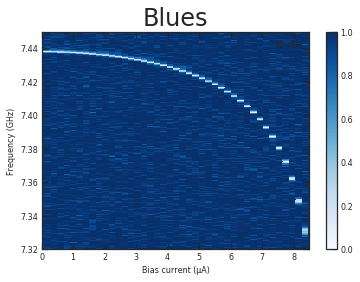

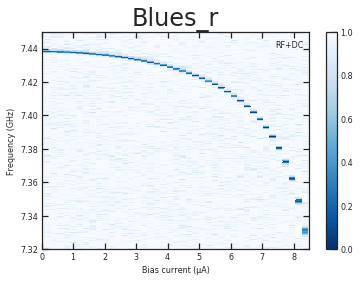

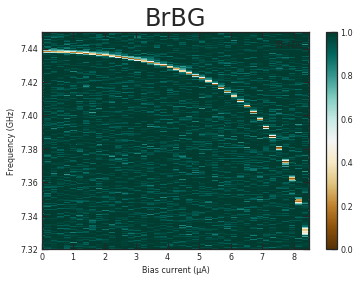

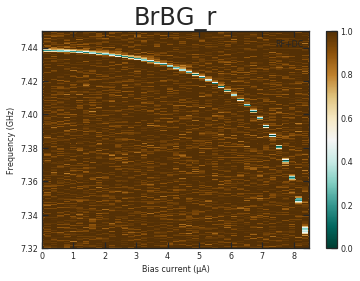

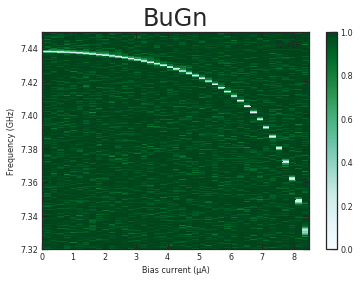

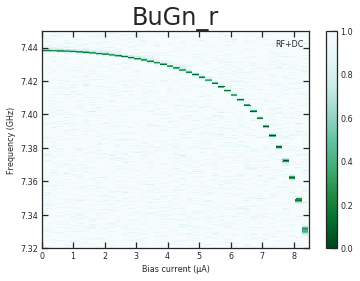

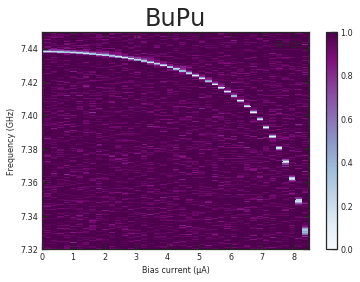

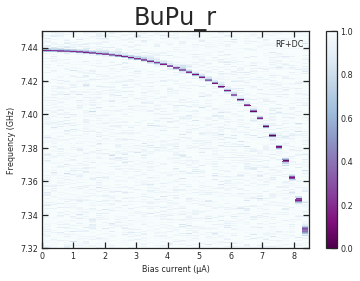

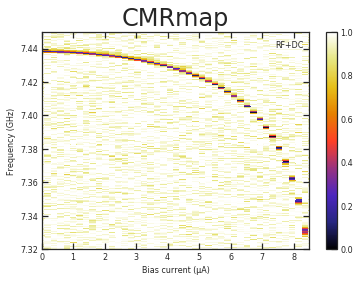

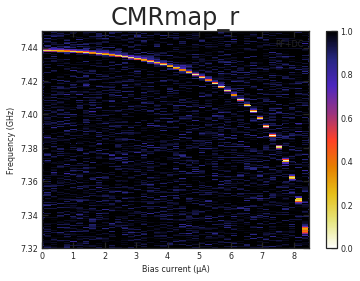

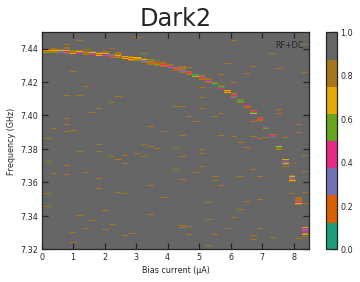

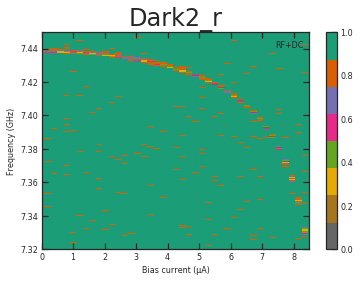

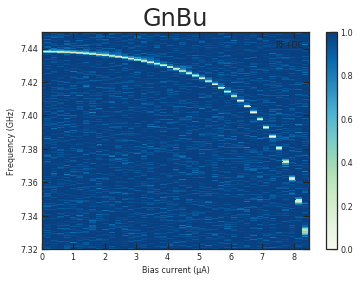

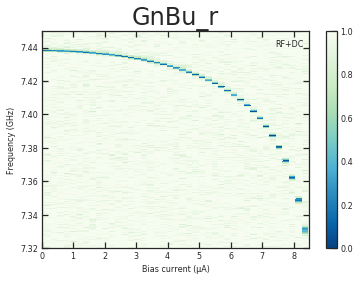

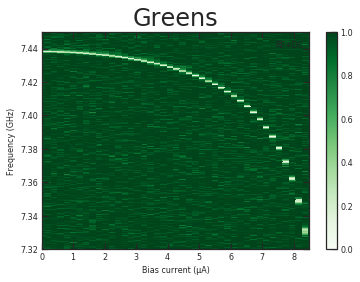

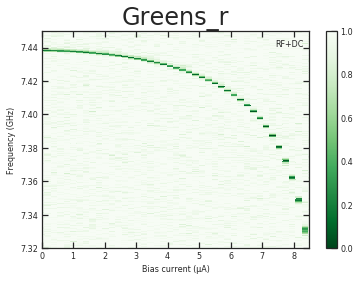

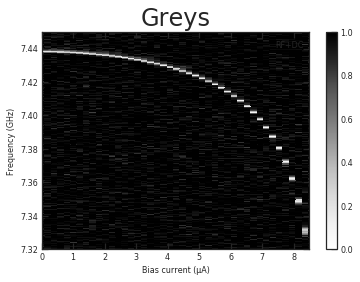

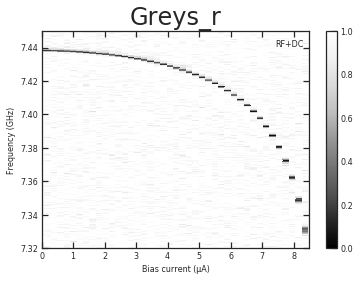

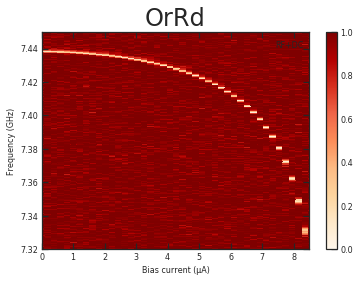

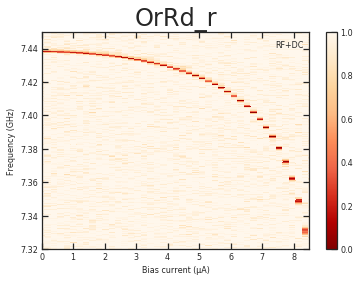

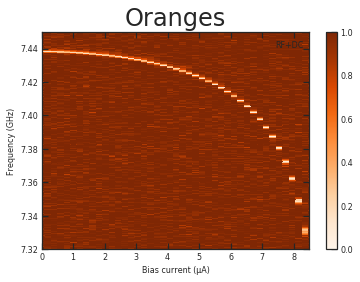

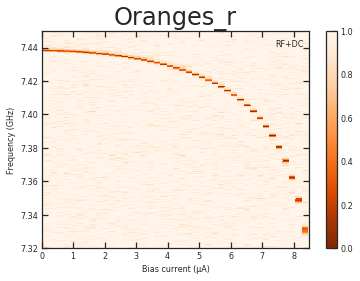

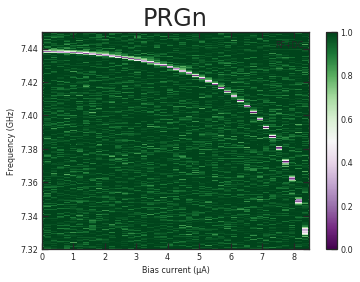

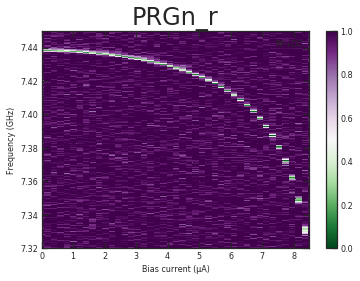

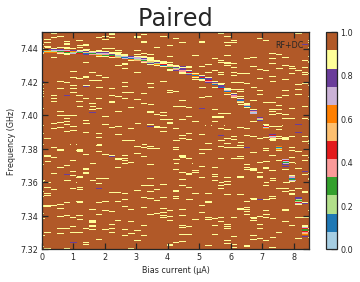

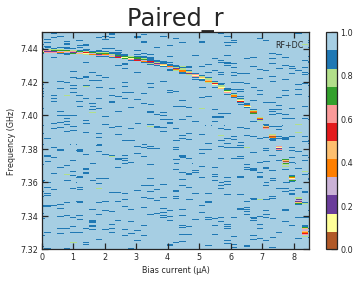

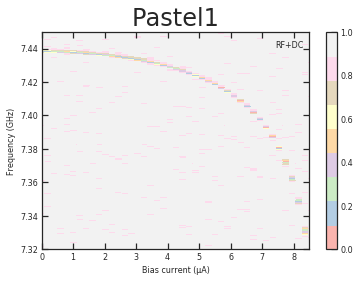

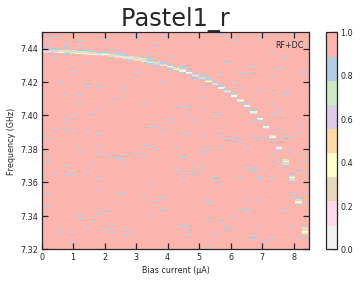

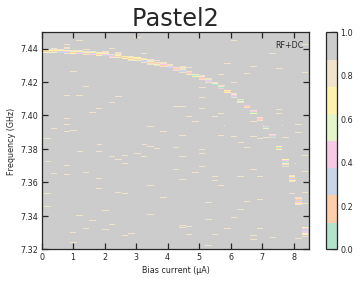

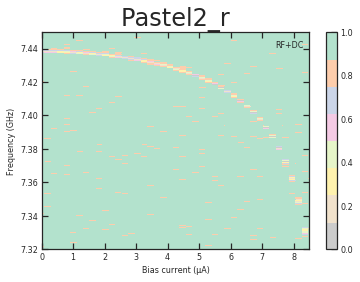

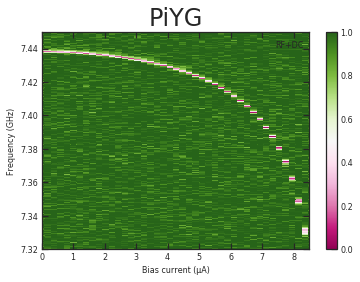

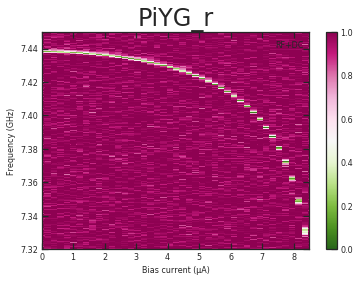

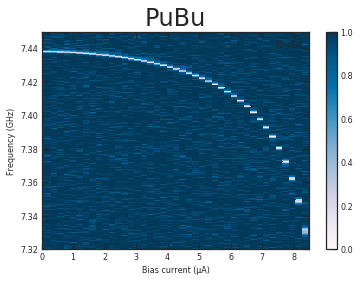

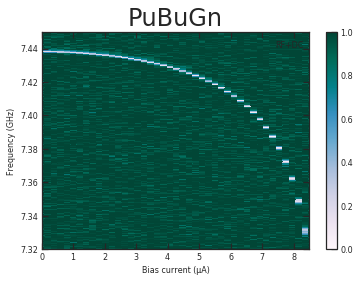

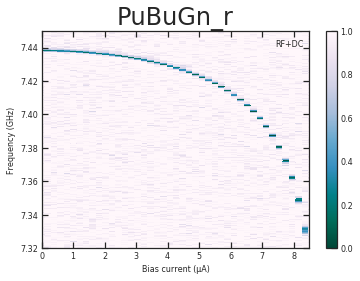

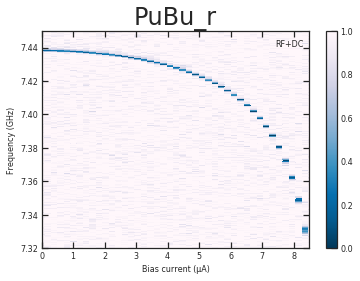

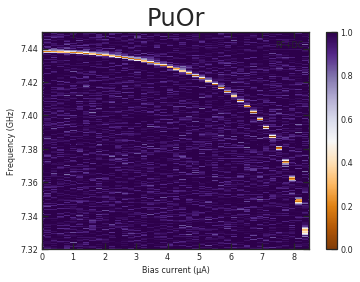

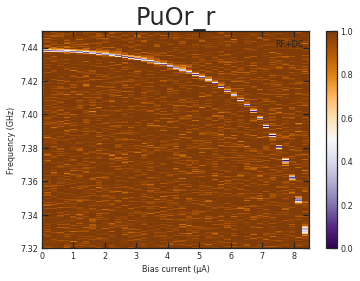

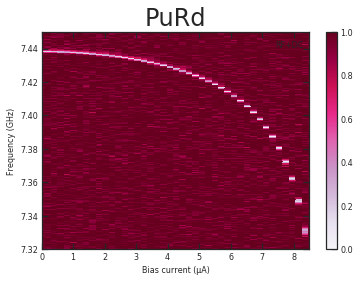

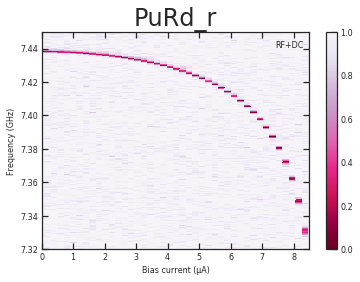

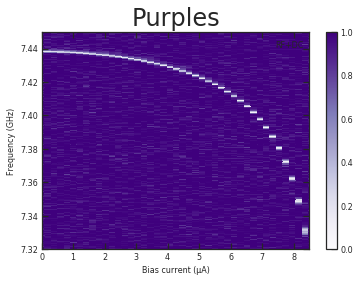

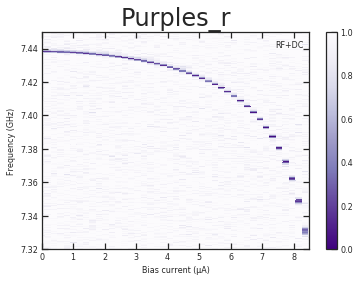

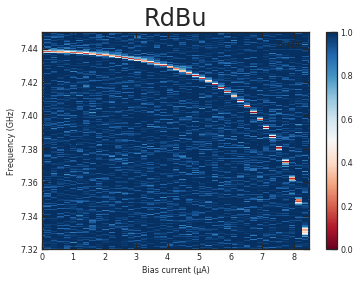

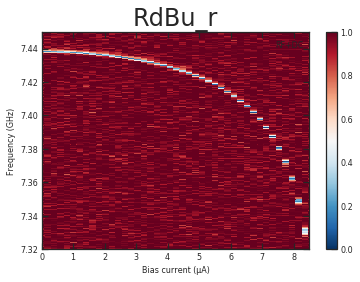

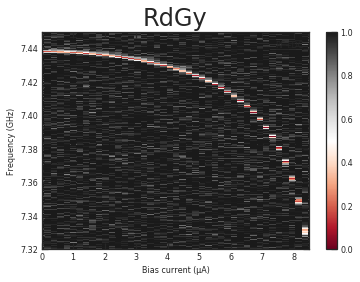

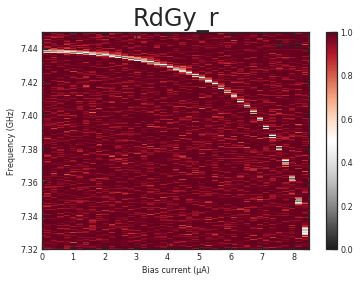

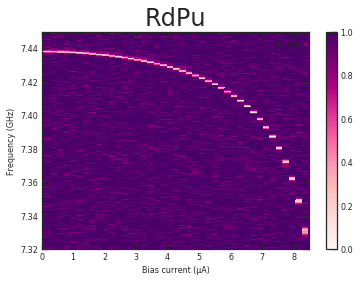

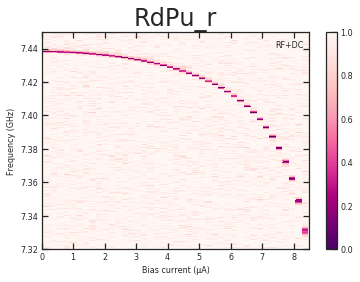

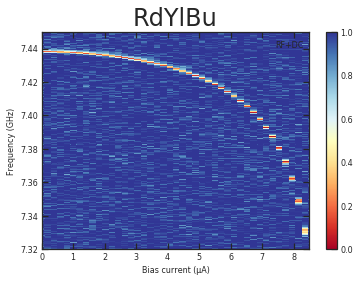

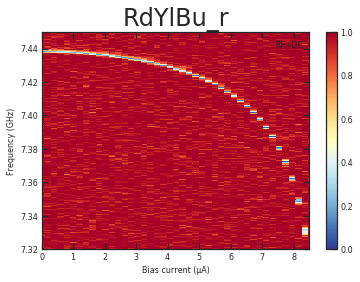

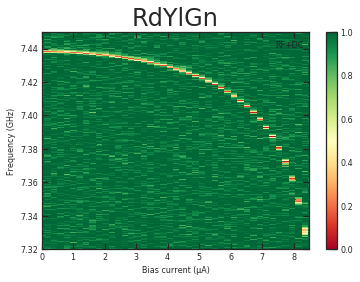

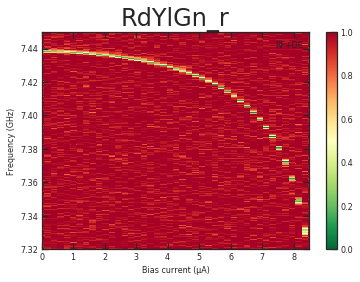

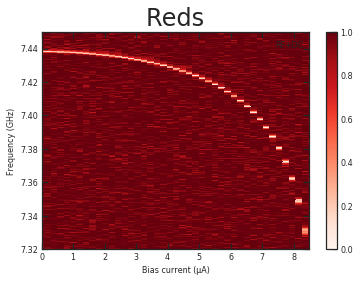

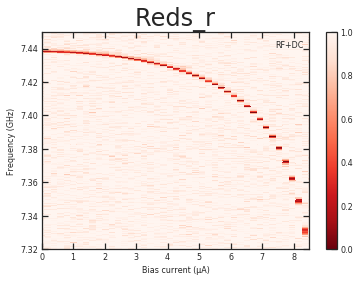

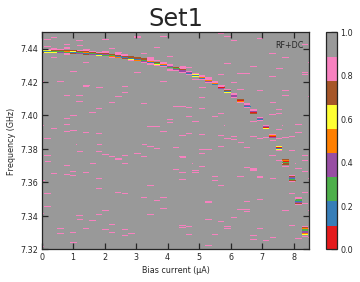

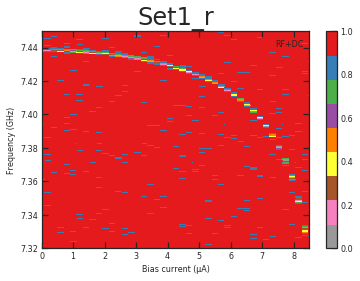

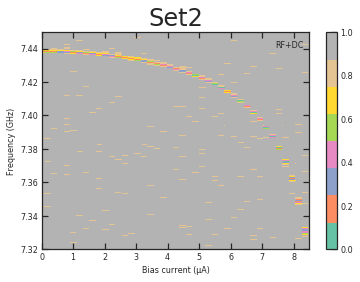

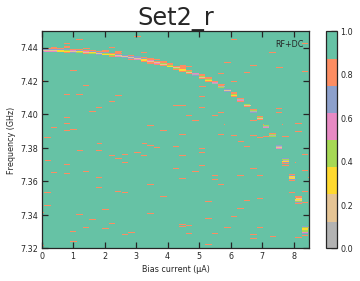

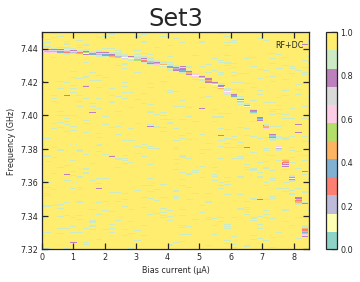

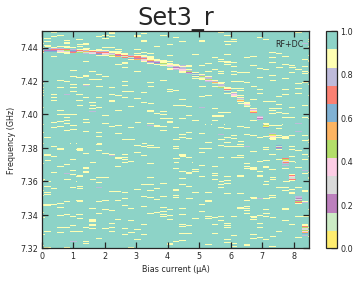

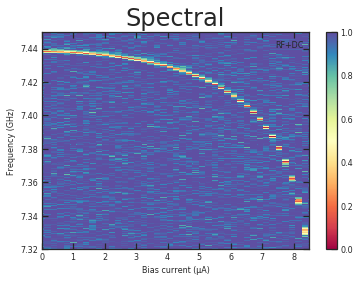

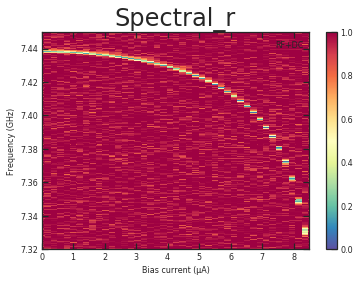

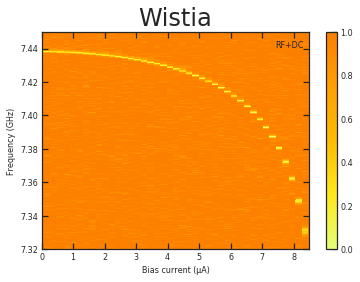

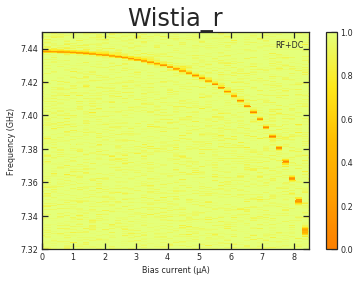

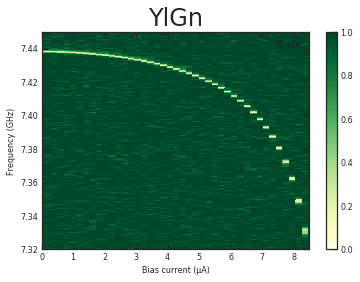

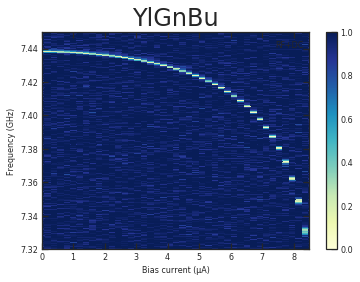

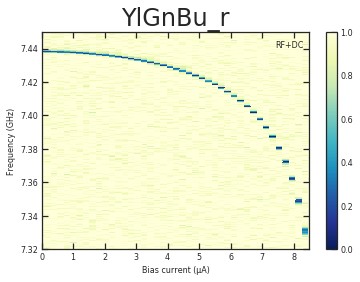

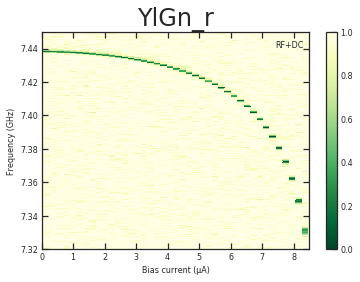

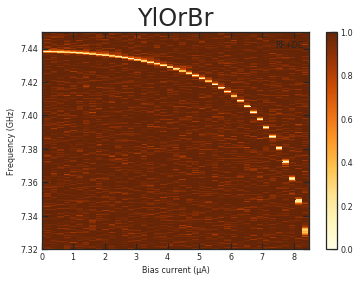

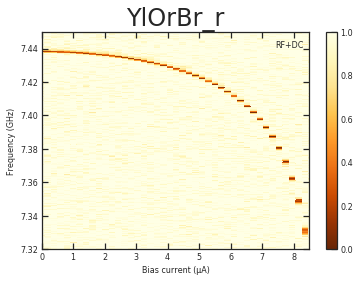

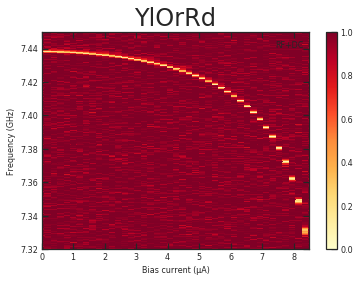

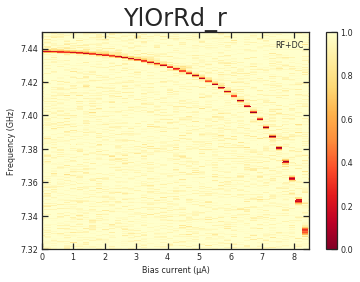

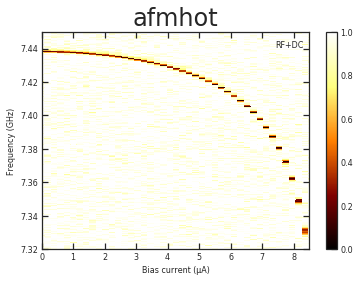

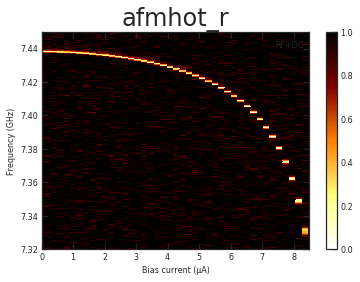

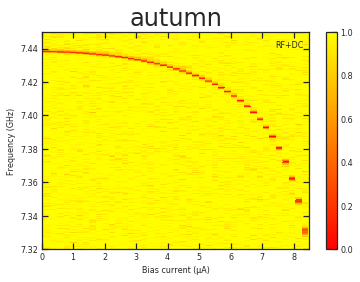

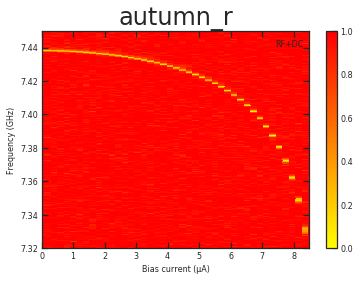

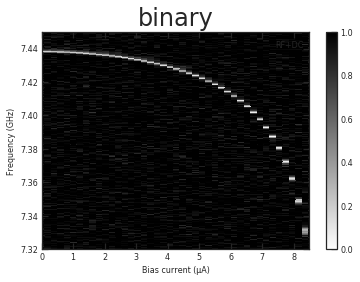

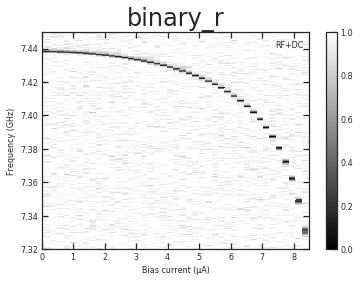

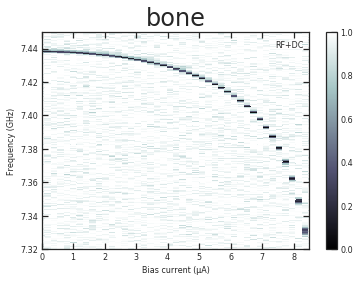

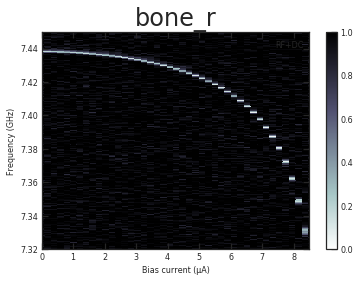

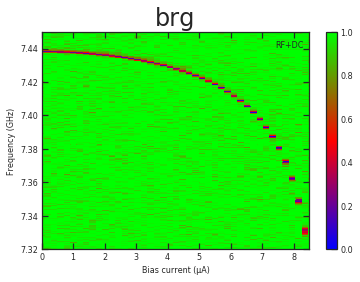

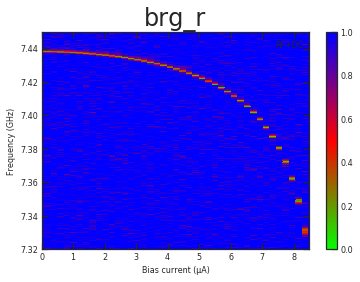

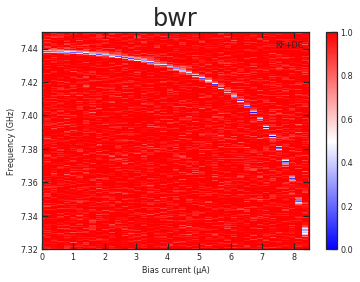

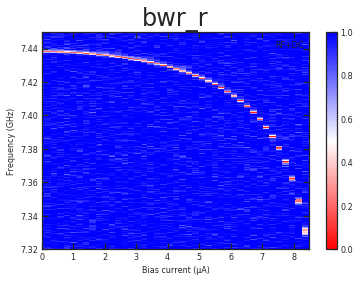

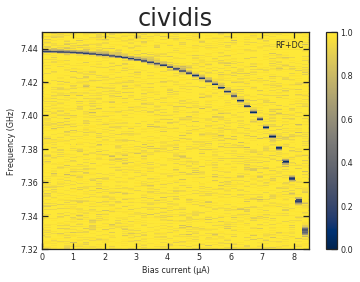

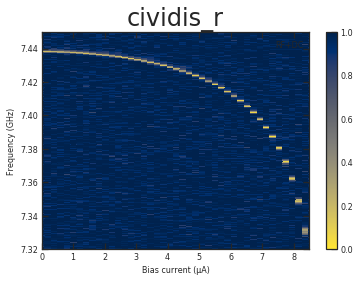

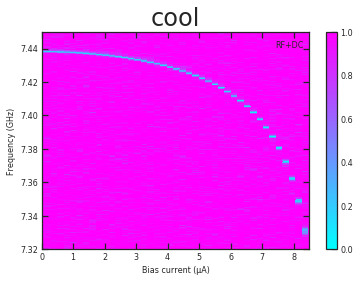

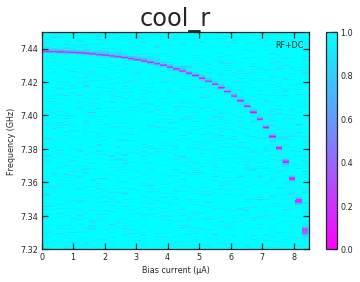

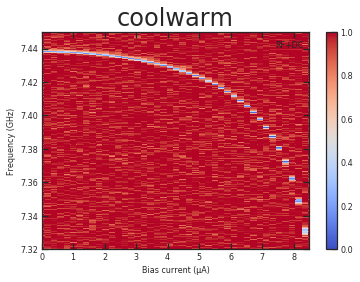

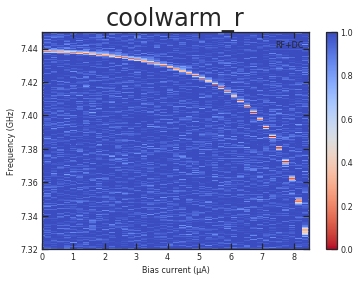

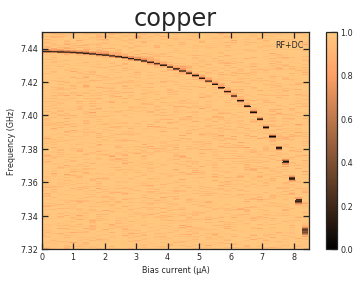

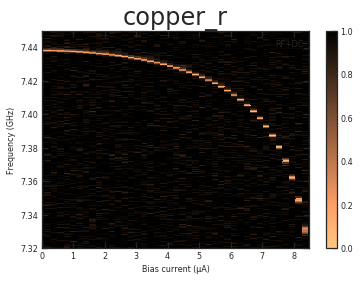

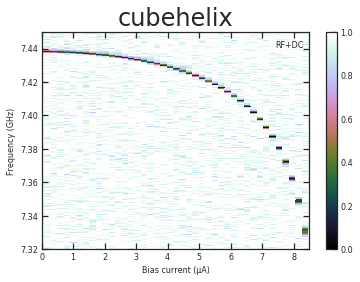

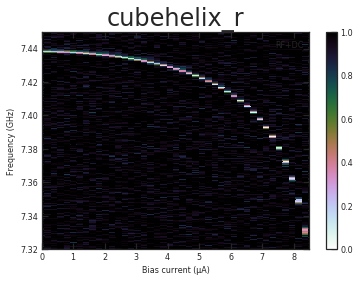

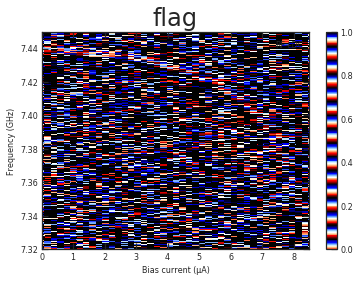

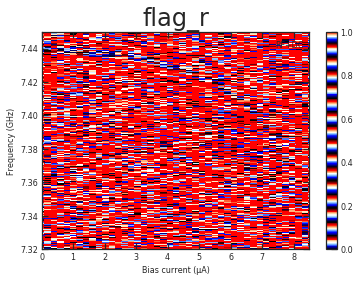

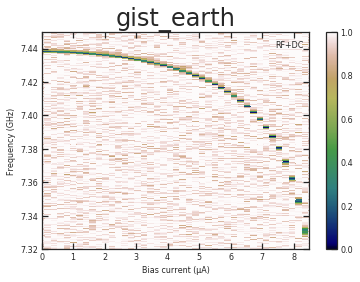

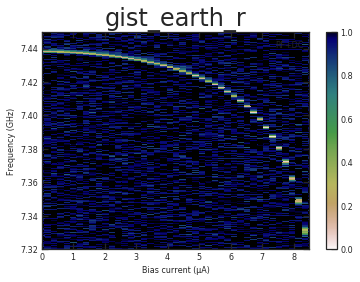

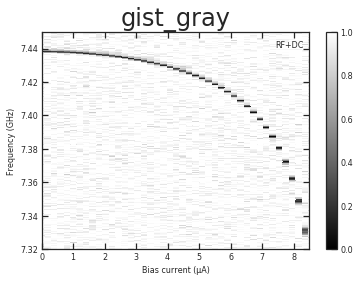

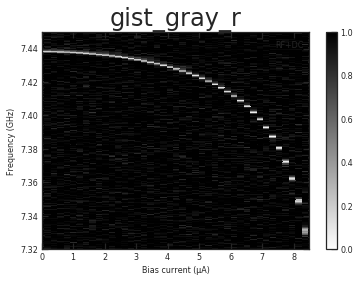

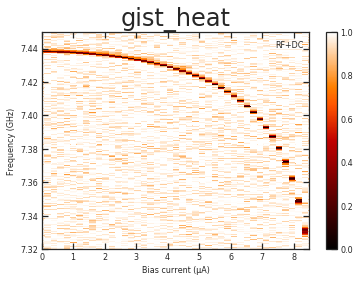

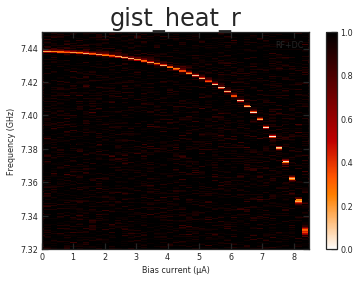

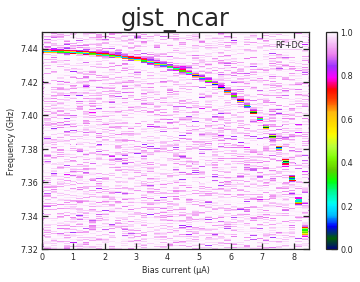

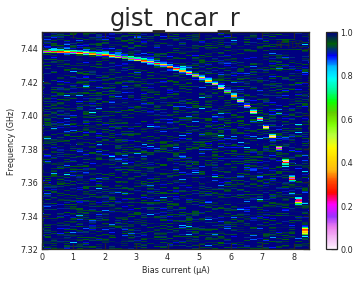

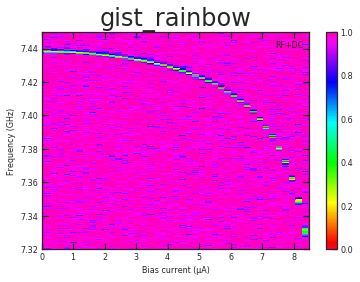

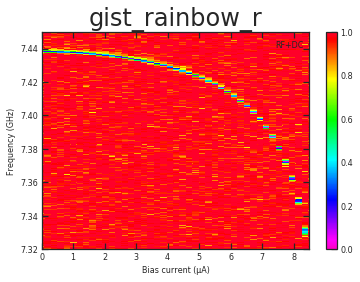

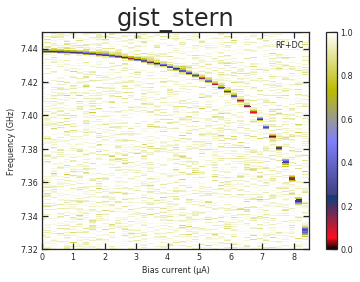

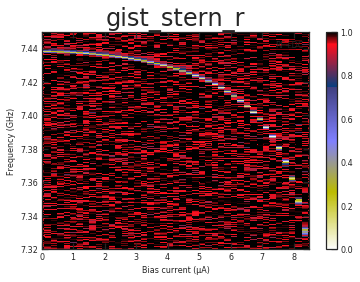

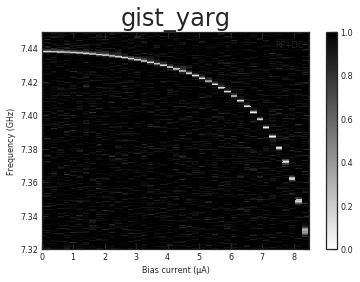

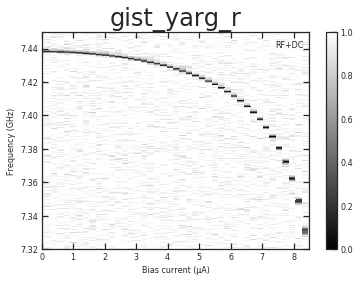

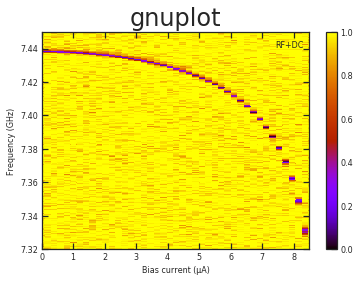

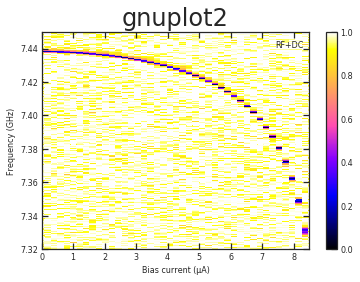

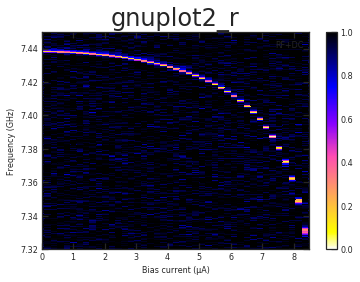

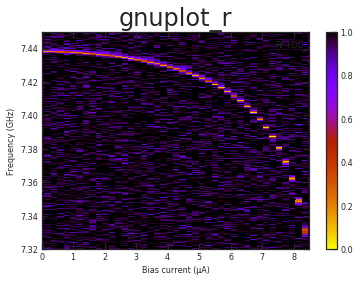

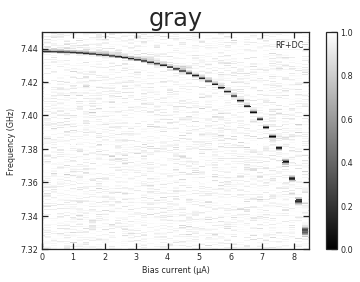

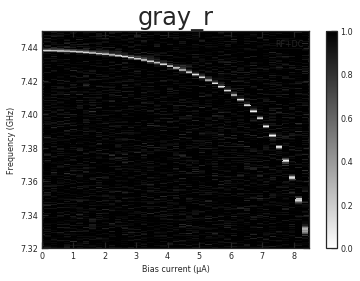

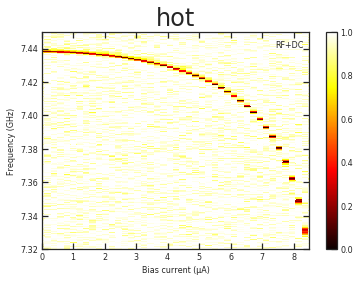

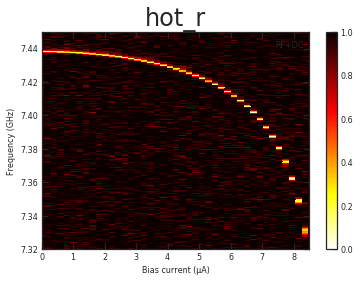

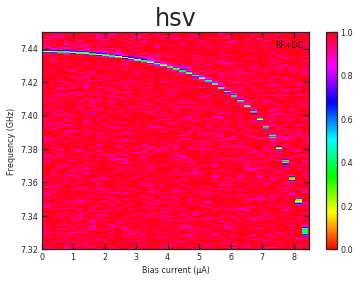

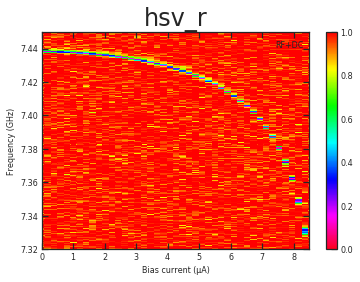

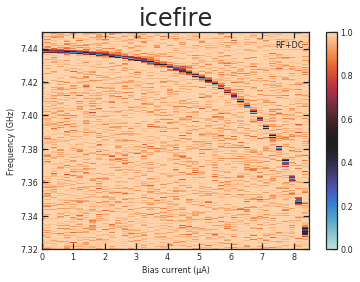

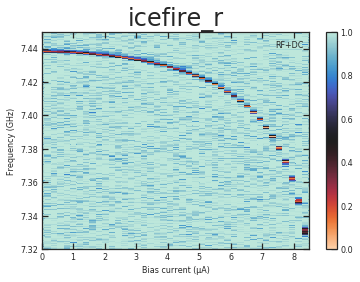

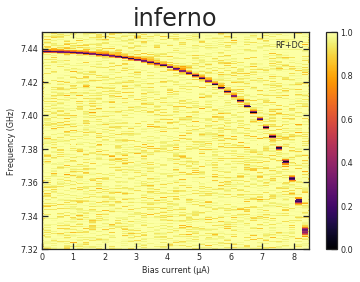

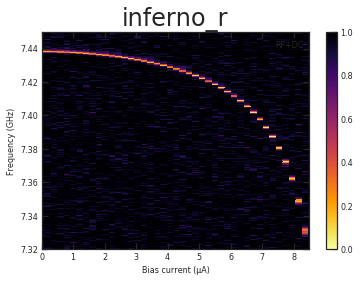

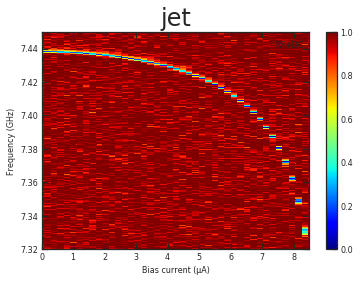

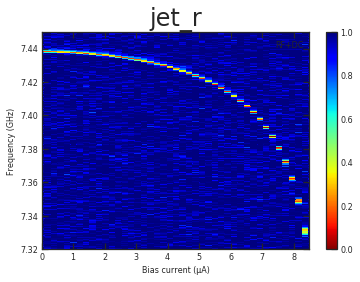

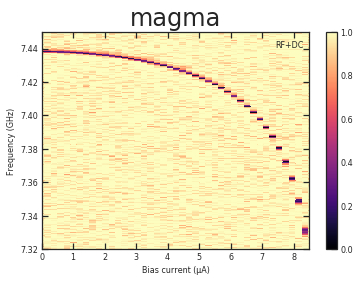

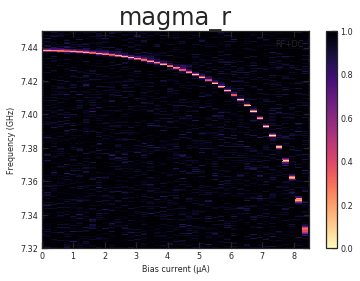

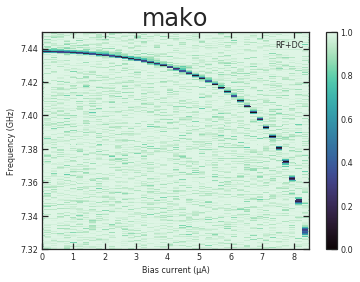

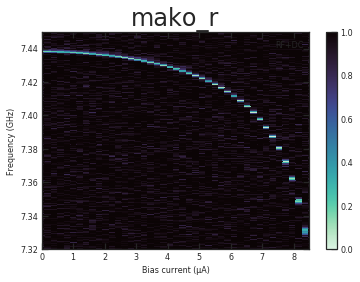

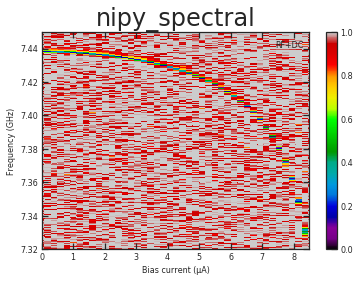

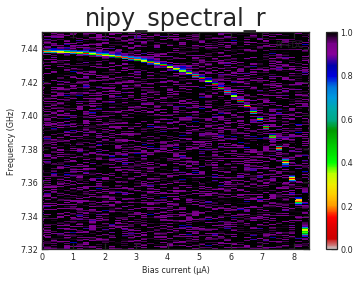

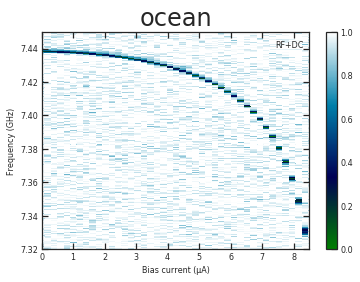

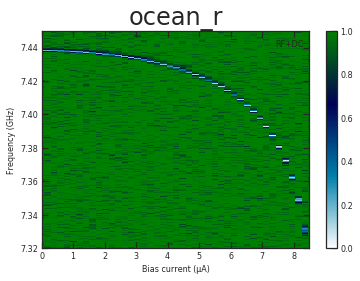

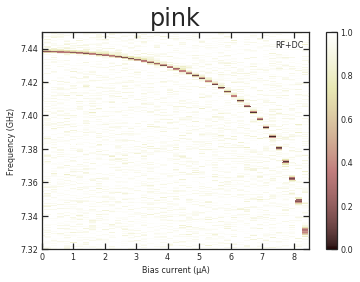

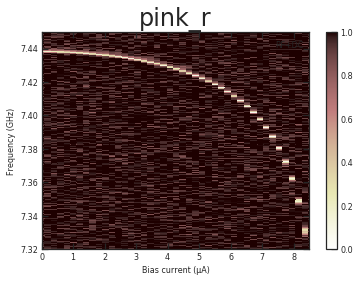

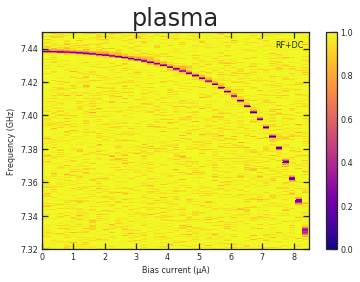

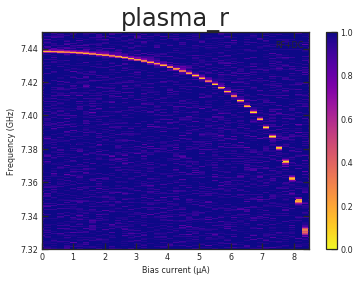

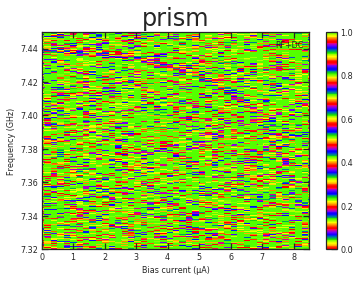

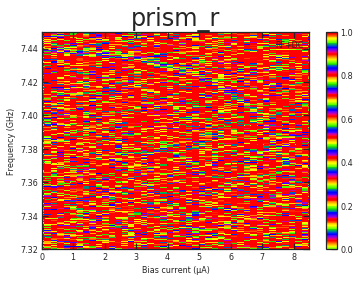

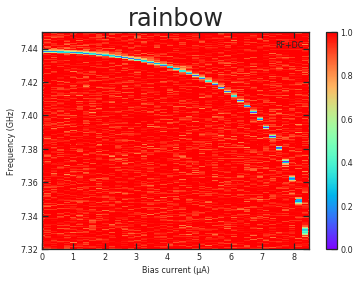

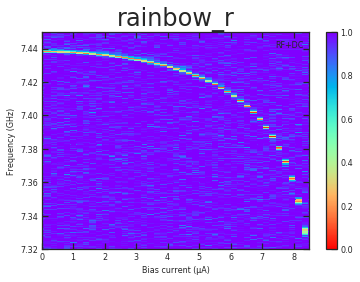

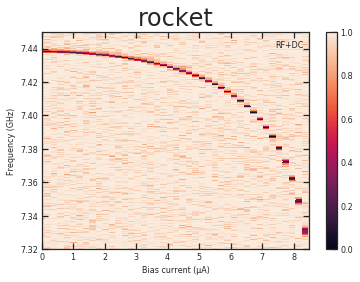

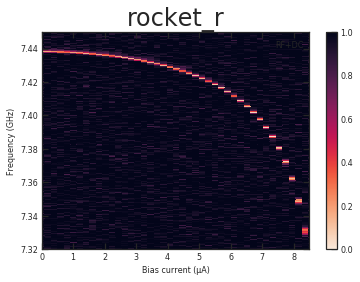

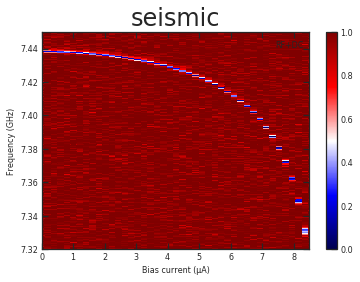

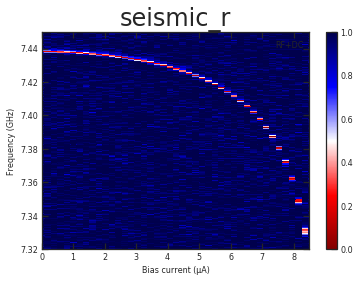

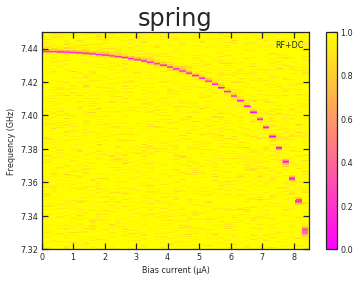

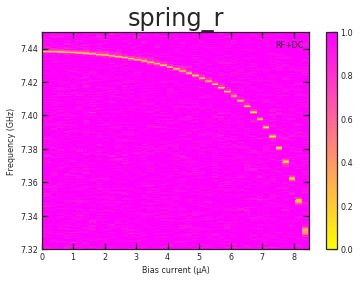

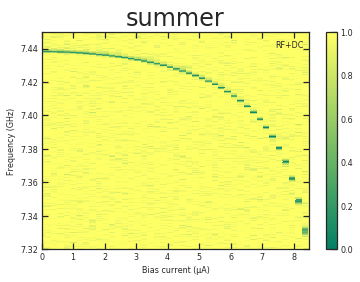

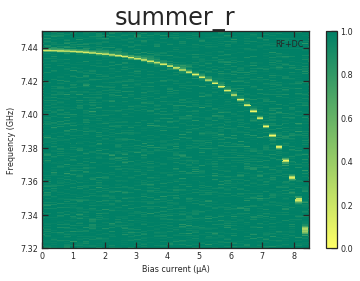

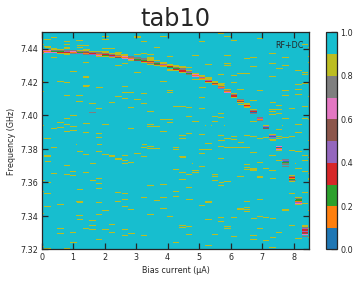

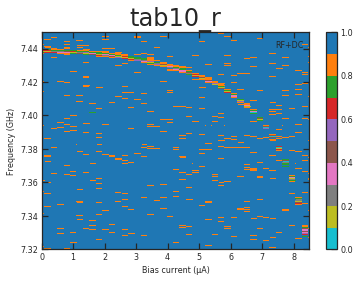

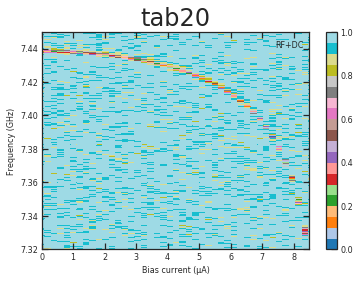

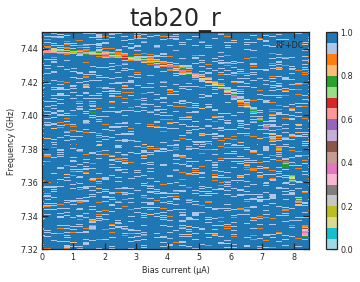

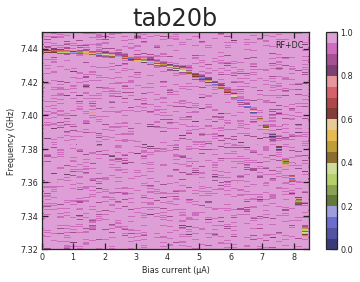

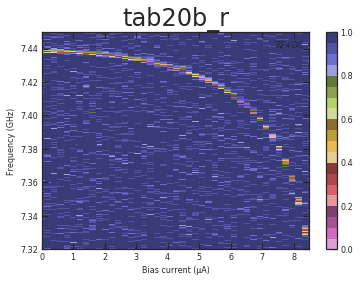

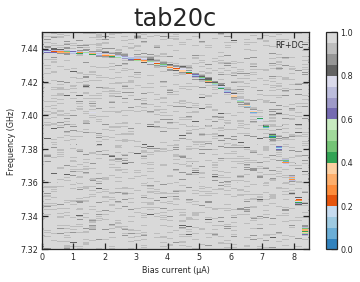

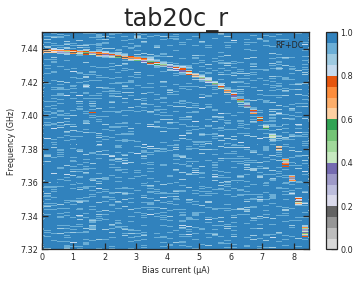

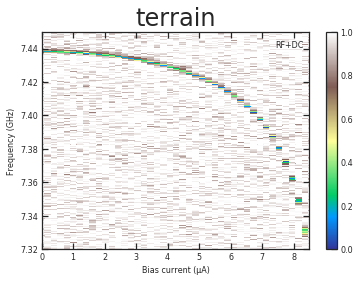

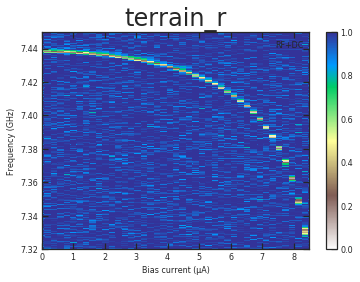

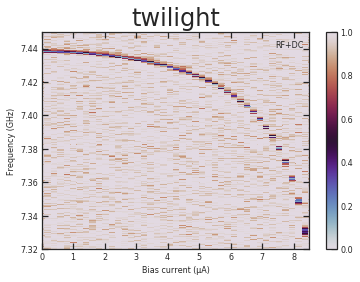

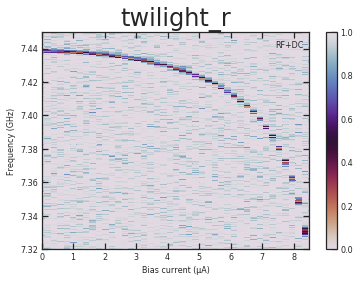

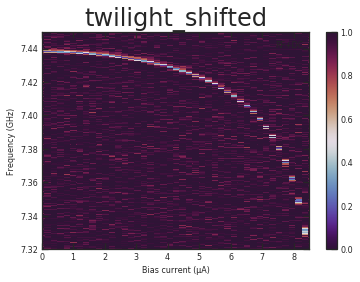

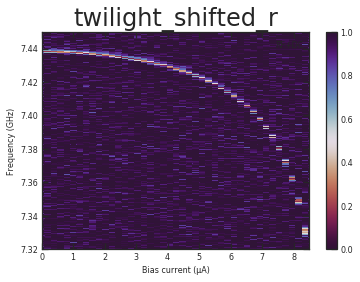

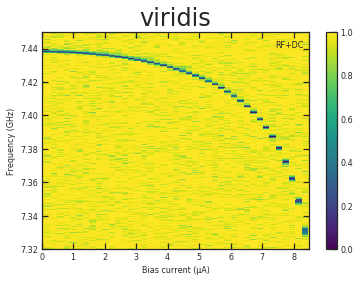

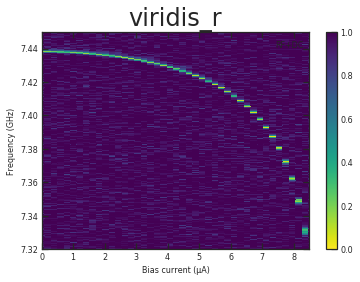

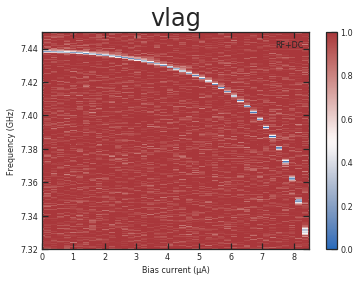

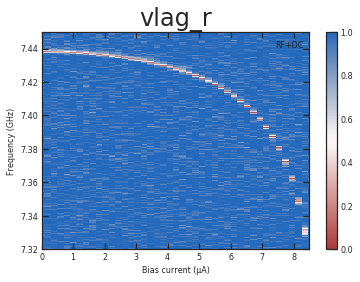

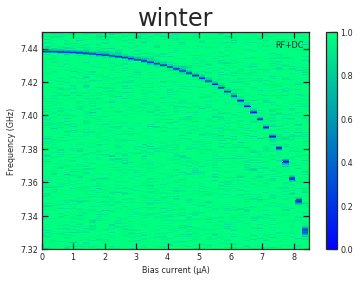

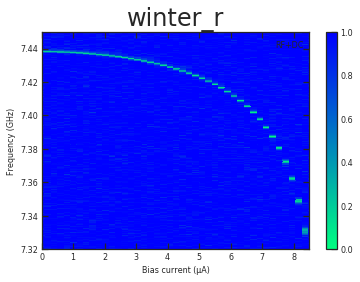

In [14]:
# testing different colormaps
for cmap in plt.colormaps():
    fig,ax4=plt.subplots()
    plt.pcolormesh(panel_2D['x'],
                   panel_2D['y'],
                   panel_2D['zraw'],
                   linewidth=0,
                   rasterized=True,
                   zorder=-1,
                   vmin=0,
                   vmax=1,
                  cmap=cmap)
    ax4.set_xlim(0, 8.5)
    ax4.set_ylim(7.32, 7.45)
    ax4.set_xlabel(panel_2D['xlabel'])
    ax4.set_ylabel(panel_2D['ylabel'])
    plt.text(0.98, 0.96, 'RF+DC', ha='right', va='top', transform=ax4.transAxes)
    plt.colorbar()
    plt.title(cmap)
    plt.show()
    plt.close()